In [ ]:
#한글 깨짐 방지 폰트 다운로드
#모든설정 후에 안되면 런타임 다시시작 (필수)
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
#라이브러리 설치와 폰트 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
#드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#폰트 설정 확인

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font

!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

sys_font number: 27
nanum_font number: 10
Python 3.6.9
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [ ]:
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False



Text(0.3, 0.3, '한글')

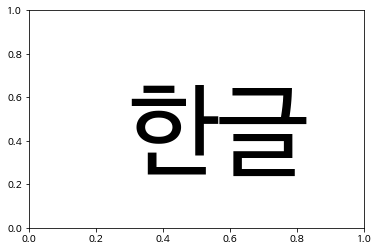

In [ ]:
#그래프 한글 테스트

plt.text(0.3, 0.3, '한글', size=100)

In [ ]:
####################여기서 부터#########################

In [ ]:
#!!!!!!2019년 거래내역과 2020년 거래내역의 비교

#1... 필요 데이터 불러오기
df2004=pd.read_csv('drive/My Drive/비씨카드/거래내역_202004.csv',encoding='euc-kr')
df2005=pd.read_csv('drive/My Drive/비씨카드/거래내역_202005.csv',encoding='euc-kr')
df1904=pd.read_csv('drive/My Drive/비씨카드/거래내역_201904.csv',encoding='euc-kr')
df1905=pd.read_csv('drive/My Drive/비씨카드/거래내역_201905.csv',encoding='euc-kr')
dfcode=pd.read_csv('drive/My Drive/비씨카드/업종코드.csv', encoding='euc-kr')

In [ ]:
#2...필요한 컬럼 추리기
df2004=df2004[['가맹점업종코드']]
df2005=df2005[['가맹점업종코드']]
df1904=df1904[['가맹점업종코드']]
df1905=df1905[['가맹점업종코드']]

#3...2019년, 2020년 데이터 합치기
df20tot=pd.concat([df2004,df2005])
df19tot=pd.concat([df1904,df1905])

#4....업종코드로 업종명 붙이기
dfcode.rename(columns={'업종코드':'가맹점업종코드'},inplace=True)
df20tot=pd.merge(df20tot,dfcode,how='left',on='가맹점업종코드')
df19tot=pd.merge(df19tot,dfcode,how='left',on='가맹점업종코드')

#5...업종코드 삭제
df20tot=df20tot.drop(['가맹점업종코드'],axis=1)
df19tot=df19tot.drop(['가맹점업종코드'],axis=1)

#6...거래량 확인
df19tot=df19tot.value_counts()
pd.DataFrame(df19tot)
df19tot

df20tot=df20tot.value_counts()
pd.DataFrame(df20tot)
df20tot

#7...업종명 불러오기 위해 새로 저장
df19tot.to_csv('dfval19.csv',encoding='euc-kr')
df20tot.to_csv('dfval20.csv',encoding='euc-kr')

#8...다시 불러오기
df20tot=pd.read_csv('dfval20.csv',encoding='euc-kr')
df19tot=pd.read_csv('dfval19.csv',encoding='euc-kr')

df20tot.columns=['업종명','거래수']
df19tot.columns=['업종명','거래수']

#9...sorting
df20tot=df20tot.sort_values(by=['거래수'],ascending=False)
df19tot=df19tot.sort_values(by=['거래수'],ascending=False)

df20_15=df20tot[:15]
df19_15=df19tot[:15]

In [ ]:
df20tot

,업종명,거래수
0,기타전문점,593682
1,편 의 점,351651
2,슈퍼 마켓,240242
3,인터넷 P/G,204003
4,이동통신요금,138781
...,...,...
129,초중고교육기관,1
128,신발,1
127,면 세 점,1
126,기념품 점,1


In [ ]:
name20=df20_15['업종명']
name19=df19_15['업종명']

nameconcat=pd.concat([name20,name19])
nameconcat=pd.concat([name20,name19])
nameconcat=list(nameconcat)
set_name=set(nameconcat) # set으로 변경해서 중복제거
nameconcat=list(set_name)

nameconcat


#12...동일업종 대상으로 해당 관련 데이터만 추출
chart20=df20tot[df20tot['업종명'].isin(nameconcat)]
chart19=df19tot[df19tot['업종명'].isin(nameconcat)]

In [ ]:
chart20


,업종명,거래수
0,기타전문점,593682
1,편 의 점,351651
2,슈퍼 마켓,240242
3,인터넷 P/G,204003
4,이동통신요금,138781
5,구내매점(국가기관등),119654
6,택시,118501
7,대형할인점,104098
8,인터넷종합Mall,39614
9,서양음식,36737


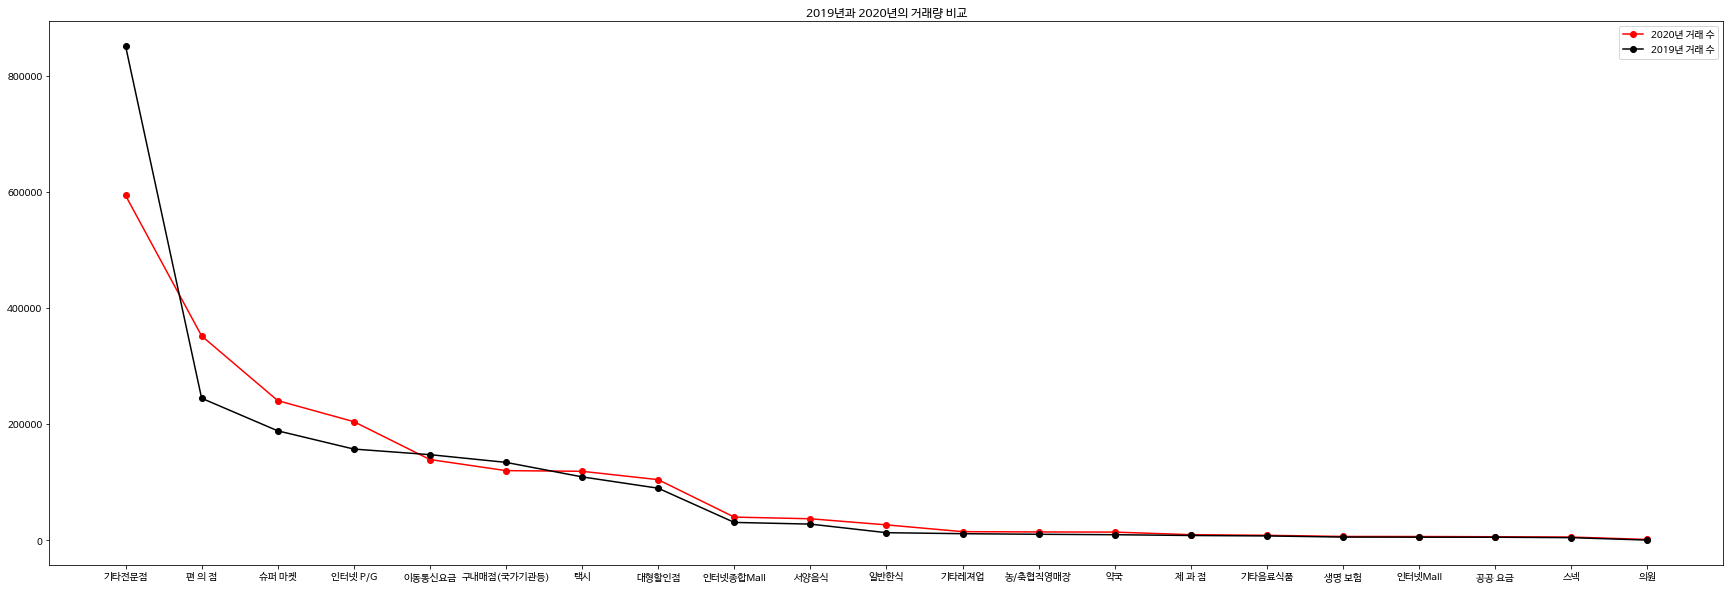

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(chart20['업종명'],chart20['거래수'],color='red',marker='o',label='2020년 거래 수')
plt.plot(chart20['업종명'],chart19['거래수'],color='black',marker='o',label='2019년 거래 수')
plt.title('2019년과 2020년의 거래량 비교')
plt.legend()
plt.show()

(0.0, 1.0)


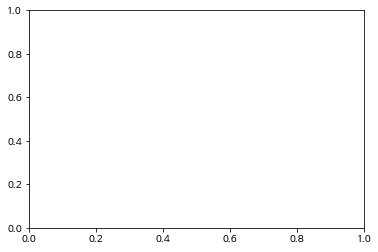